In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from metadata_utils import get_metadata, get_tuned_alg_perf, process_metafeatures, compute_feature_corrs

In [2]:
# read tuned results dataset
tuned_agg_df = pd.read_csv("./results/tuned_aggregated_results.csv")

# read dataset meta-features
dataset_version = ""

# For choosing metafeatures
filter_families = [
    'general',
    'statistical',
    'info-theory'
]

_, metafeatures_df = get_metadata(dataset_version)

metafeatures_processed = process_metafeatures(metafeatures_df, filter_families=filter_families)
metafeatures_df = metafeatures_processed

/home/shared/tabzilla/tabzilla_analysis/metadata_utils.py:56: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metafeatures_processed = metafeatures_df.fillna(metafeatures_df.median())


In [3]:
tuned_agg_df.head()


,Unnamed: 0,alg_name,dataset_name,Accuracy__test_median,Accuracy__test_mean,time__train_median,time__train_mean,dataset_name_count,Accuracy__test_mean_min,Accuracy__test_mean_max,...,normalized_F1__test_mean,F1_rank_mean,F1_rank_median,Log Loss__test_median,Log Loss__test_mean,Log Loss__test_mean_min,Log Loss__test_mean_max,normalized_Log Loss__test_mean,Log Loss_rank_mean,Log Loss_rank_median
0,0,CatBoost,openml__APSFailure__168868,0.994145,0.994013,6.412328,7.276401,10,0.970303,0.994500,...,0.979880,3.0,2.0,0.018329,0.018939,0.017652,0.624879,0.002121,3.0,2.0
1,1,CatBoost,openml__Amazon_employee_access__34539,0.946903,0.947359,1.708439,1.729567,10,0.930422,0.951570,...,0.800861,4.0,3.0,0.156969,0.156347,0.155615,0.364447,0.003507,2.0,2.0
2,2,CatBoost,openml__Australian__146818,0.869565,0.872464,1.347650,1.393643,10,0.711594,0.872464,...,1.000000,1.0,2.0,0.290150,0.302677,0.302677,0.755920,0.000000,1.0,1.0
3,3,CatBoost,openml__Bioresponse__9910,0.798940,0.795521,5.815126,6.748842,10,0.736600,0.796848,...,0.977987,2.0,1.0,0.455072,0.456102,0.451718,0.767631,0.013877,3.0,1.0
4,4,CatBoost,openml__Census-Income__168340,0.958869,0.958658,830.825629,857.921920,10,0.945370,0.958658,...,1.000000,1.0,1.0,0.109673,0.109425,0.109108,0.268570,0.001986,2.0,2.0


In [4]:
metafeatures_df.head()

,dataset_name,f__pymfe.general.attr_to_inst,f__pymfe.general.cat_to_num,f__pymfe.general.freq_class.count,f__pymfe.general.freq_class.histogram.0,f__pymfe.general.freq_class.histogram.1,f__pymfe.general.freq_class.histogram.2,f__pymfe.general.freq_class.histogram.3,f__pymfe.general.freq_class.histogram.4,f__pymfe.general.freq_class.histogram.5,...,f__pymfe.info-theory.mut_inf.quantiles.1,f__pymfe.info-theory.mut_inf.quantiles.2,f__pymfe.info-theory.mut_inf.quantiles.3,f__pymfe.info-theory.mut_inf.quantiles.4,f__pymfe.info-theory.mut_inf.range,f__pymfe.info-theory.mut_inf.sd,f__pymfe.info-theory.mut_inf.skewness,f__pymfe.info-theory.ns_ratio,f__pymfe.statistical.iq_range,f__pymfe.statistical.t_mean
0,openml__cjs__14967__fold_0,0.014758,0.064516,6,0.166667,0.166667,0.0,0.166667,0.0,0.166667,...,0.679330,1.292908,1.906486,2.520065,2.454313,1.735461,0.0,2.325505,NaN,NaN
1,openml__cjs__14967__fold_1,0.014758,0.064516,6,0.166667,0.166667,0.0,0.166667,0.0,0.166667,...,0.677179,1.291474,1.905769,2.520065,2.457180,1.737489,0.0,2.336153,NaN,NaN
2,openml__cjs__14967__fold_2,0.014758,0.064516,6,0.166667,0.166667,0.0,0.166667,0.0,0.166667,...,0.684753,1.296524,1.908294,2.520065,2.447082,1.730348,0.0,2.327456,NaN,NaN
3,openml__cjs__14967__fold_3,0.014758,0.064516,6,0.166667,0.166667,0.0,0.166667,0.0,0.166667,...,0.688757,1.299327,1.909898,2.520468,2.442282,1.726954,0.0,2.313806,NaN,NaN
4,openml__cjs__14967__fold_4,0.014758,0.064516,6,0.166667,0.166667,0.0,0.166667,0.0,0.166667,...,0.681562,1.294577,1.907592,2.520608,2.452061,1.733869,0.0,2.322964,NaN,NaN


In [5]:
# categorize each alg

neural_algs = [
    "MLP",
    "TabNet",
    "VIME",
    "TabTransformer",
    "NODE",
    "STG",
    "NAM",
    "DeepFM",
    "SAINT",
    "DANet",
    "rtdl_MLP",
    "rtdl_ResNet",
    "rtdl_FTTransformer",
]

tree_algs = [
    "LightGBM",
    "XGBoost",
    "CatBoost"
]

tuned_agg_df.loc[:, "alg_type"] = "baseline"
tuned_agg_df.loc[tuned_agg_df["alg_name"].isin(neural_algs), "alg_type"] = "neural"
tuned_agg_df.loc[tuned_agg_df["alg_name"].isin(tree_algs), "alg_type"] = "trees"


In [6]:
tuned_agg_df.groupby("alg_type")["alg_name"].value_counts()

alg_type  alg_name          
baseline  DecisionTree          171
          RandomForest          170
          LinearModel           167
          KNN                   164
          SVM                   143
neural    rtdl_MLP              171
          MLP                   170
          rtdl_ResNet           170
          TabNet                166
          STG                   163
          VIME                  162
          DANet                 147
          NODE                  138
          TabTransformer        122
          SAINT                 106
          DeepFM                 90
          NAM                    80
          rtdl_FTTransformer     42
trees     XGBoost               171
          LightGBM              164
          CatBoost              163
Name: alg_name, dtype: int64

In [7]:
# for which dataset does the best-performing baseline alg get at least 0.9 normalized metric?
# best_performance_by_alg_type = tuned_agg_df.groupby(["dataset_name", "alg_type"])["normalized_F1__test_mean"].max().reset_index()
# best_performance_by_alg_type = tuned_agg_df.groupby(["dataset_name", "alg_type"])["normalized_Accuracy__test_mean"].max().reset_index()
best_performance_by_alg_type = tuned_agg_df.groupby(["dataset_name", "alg_type"])["normalized_Log Loss__test_mean"].min().reset_index()

In [17]:
# order datasets by how well the decision tree model performs. also provide the range of metric for the dataset
# metric = "Log Loss"
metric = "Log Loss"

sorted_by_dt = {}

for metric in ["Log Loss", "Accuracy", "F1"]:

    if metric == "Log Loss":
        ascending = True
        format_metric = lambda x: f'{x:.2e}'
    else:
        ascending = False
        format_metric = lambda x: f'{x:.2f}'
        
    sorted_by_dt[metric] = tuned_agg_df[tuned_agg_df["alg_name"] == "DecisionTree"] \
        .sort_values(f"normalized_{metric}__test_mean", 
            ignore_index=True,
            ascending=ascending,
        )[["dataset_name",f"{metric}__test_mean", f"normalized_{metric}__test_mean", f"{metric}__test_mean_min", f"{metric}__test_mean_max"]]

    sorted_by_dt[metric].rename(columns={
        f"{metric}__test_mean": f"Tree {metric}",
        f"normalized_{metric}__test_mean": f"Tree {metric} (normalized)",
        f"{metric}__test_mean_min": f"Min {metric}",
        f"{metric}__test_mean_max": f"Max {metric}"
        }, inplace=True)

    # print some analysis
    print(f"--------METRIC: {metric}--------")

    # print num. datasets where tree metric is <= 0.1
    print(f"total datasets: {len(sorted_by_dt[metric])}")
    num_le_10 = sum(sorted_by_dt[metric][f"Tree {metric} (normalized)"] <= 0.1)
    print(f"num. datasets where tree metric <= 0.1: {num_le_10} ({100. * float(num_le_10) / len(sorted_by_dt[metric]):.2f}%)")
    num_mid = sum((sorted_by_dt[metric][f"Tree {metric} (normalized)"] > 0.1) & (sorted_by_dt[metric][f"Tree {metric} (normalized)"] < 0.9))
    print(f"num. datasets where tree metric in (0.1, 0.9): {num_mid} ({100. * float(num_mid) / len(sorted_by_dt[metric]):.2f}%)")
    num_ge_90 = sum(sorted_by_dt[metric][f"Tree {metric} (normalized)"] >= 0.9)
    print(f"num. datasets where tree metric <= 0.1: {num_ge_90} ({100. * float(num_ge_90) / len(sorted_by_dt[metric]):.2f}%)")
  
    # format cols
    sorted_by_dt[metric].loc[:, f"Tree {metric} (normalized)"] = sorted_by_dt[metric].loc[:, f"Tree {metric} (normalized)"].apply(lambda x: f'{x:.2f}')
    sorted_by_dt[metric].loc[:, f"Tree {metric}"] = sorted_by_dt[metric].loc[:, f"Tree {metric}"].apply(format_metric)
    sorted_by_dt[metric].loc[:, f"Min {metric}"] = sorted_by_dt[metric].loc[:, f"Min {metric}"].apply(format_metric)
    sorted_by_dt[metric].loc[:, f"Max {metric}"] = sorted_by_dt[metric].loc[:, f"Max {metric}"].apply(format_metric)

    # sorted_by_dt.loc[:, f"Tree {metric} (normalized)"] = sorted_by_dt.loc[:, f"Tree {metric} (normalized)"].apply(lambda x: f'{x:.2f}')

    sorted_by_dt[metric].set_index("dataset_name")
    # best_performance_by_alg_type[(best_performance_by_alg_type["alg_name"] == "DecisionTree")]

    sorted_by_dt[metric].to_csv(f"./results/hardness_tree_{metric}.csv", float_format="%.2e")
    # print(sorted_by_dt)

--------METRIC: Log Loss--------
total datasets: 171
num. datasets where tree metric <= 0.1: 38 (22.22%)
num. datasets where tree metric in (0.1, 0.9): 102 (59.65%)
num. datasets where tree metric <= 0.1: 31 (18.13%)
--------METRIC: Accuracy--------
total datasets: 171
num. datasets where tree metric <= 0.1: 20 (11.70%)
num. datasets where tree metric in (0.1, 0.9): 123 (71.93%)
num. datasets where tree metric <= 0.1: 28 (16.37%)
--------METRIC: F1--------
total datasets: 171
num. datasets where tree metric <= 0.1: 20 (11.70%)
num. datasets where tree metric in (0.1, 0.9): 119 (69.59%)
num. datasets where tree metric <= 0.1: 32 (18.71%)


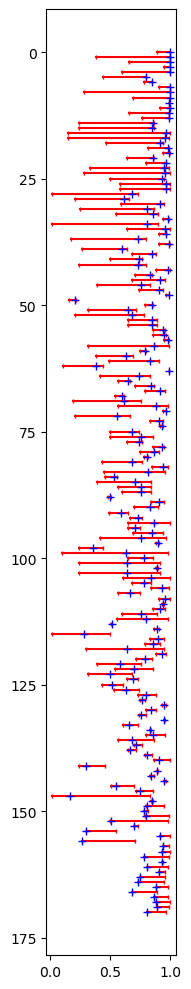

In [37]:
# plot actual metric range + tree for all datasets
metric = "F1"

df = sorted_by_dt[metric]

text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')


def format_axes(ax):
    # ax.margins(0.2)
    # ax.set_axis_off()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
    # ax.set_xlim(-0.05, 1.05)
    # ax.set_xscale('log')
    ax.invert_yaxis()

marker_style = {"color": "r", "markersize": 3}
tree_style = {"color": "b"}
marker = "|"

fig, ax = plt.subplots(ncols=1, figsize=(2, 10))


mins = [0, 1, 2]
maxs = [1, 2, 3]
names = ['a', 'b', 'c']

for i in range(len(df)):
    row = df.iloc[i]
    # ax.text(-0.1, i, row["dataset_name"], **text_style)
    # print((row[f"Min {metric}"], row[f"Max {metric}"]))
    ax.plot([float(row[f"Min {metric}"]), float(row[f"Max {metric}"])], [i, i], marker=marker, **marker_style)
    ax.plot(float(row[f"Tree {metric}"]), i, marker="+", **tree_style)

# ax.set_xlim(0.0, 1.0)
format_axes(ax)
# plt.plot()

plt.tight_layout()
plt.show()

In [31]:
df.head(50)

,dataset_name,Tree Log Loss,Tree Log Loss (normalized),Min Log Loss,Max Log Loss
0,openml__mushroom__24,9.99e-16,0.00,9.99e-16,1.76e-01
1,openml__musk__3950,9.99e-16,0.00,9.99e-16,5.43e-01
2,openml__irish__3543,9.99e-16,0.00,9.99e-16,8.73e-01
3,openml__acute-inflammations__10089,9.99e-16,0.00,9.99e-16,1.77e+00
4,openml__collins__3567,1.47e-14,0.00,1.47e-14,6.31e+00
5,openml__cardiotocography__9979,3.26e-02,0.00,9.21e-15,1.49e+01
6,openml__adult-census__3953,3.46e-01,0.00,2.80e-01,2.62e+01
7,openml__adult__7592,3.44e-01,0.00,2.76e-01,2.63e+01
8,openml__Click_prediction_small__190408,4.36e-01,0.00,4.10e-01,5.82e+00
9,openml__philippine__190410,5.45e-01,0.01,4.59e-01,1.73e+01
